In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import math
from typing import List

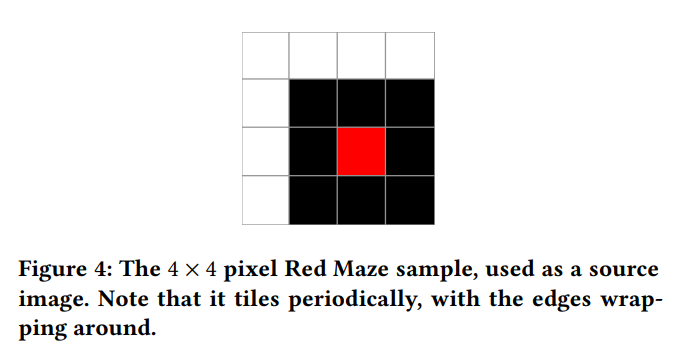

size: (4, 4)
[[255, 255, 255, 255], [255, 0, 0, 0], [255, 0, 138, 0], [255, 0, 0, 0]]


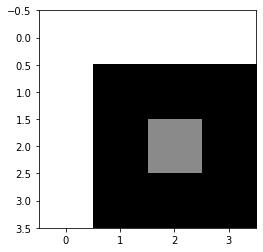

In [150]:
# Load sample image
pixels = [[255, 255, 255, 255], [255, 0, 0, 0], [255, 0, 138, 0], [255, 0, 0, 0]]
input_size = (4, 4)
# pixels = [[255, 255, 255, 255, 255, 255, 255, 0], 
#           [0, 255, 255, 255, 255, 255, 255, 255], 
#           [255, 0, 0, 0, 255, 255, 255, 255], 
#           [255, 255, 255, 255, 0, 0, 255, 255],
#           [255, 255, 255, 255, 255, 255, 0, 0],
#           [0, 0, 0, 255, 255, 255, 255, 255],
#           [255, 255, 0, 0, 255, 255, 255, 255],
#           [255, 255, 255, 255, 0, 0, 255, 255]]
# input_size = (8, 8)
output_size = (50, 50)

plt.imshow(pixels, cmap="gray") # create plt
print(f'size: {input_size}')
print(pixels)
plt.show()

In [151]:
UP = (0, -1)
LEFT = (-1, 0)
DOWN = (0, 1)
RIGHT = (1, 0)
UP_LEFT = (-1, -1)
UP_RIGHT = (1, -1)
DOWN_LEFT = (-1, 1)
DOWN_RIGHT = (1, 1)
dirs = [UP, DOWN, LEFT, RIGHT, UP_LEFT, UP_RIGHT, DOWN_LEFT, DOWN_RIGHT]

def validDirs(pos):
    x, y = pos
    
    validDirections = []

    if x == 0:
        validDirections.extend([RIGHT])
        if y == 0:
            validDirections.extend([DOWN, DOWN_RIGHT])
        elif y == output_size[1]-1:
            validDirections.extend([UP, UP_RIGHT])
        else:
            validDirections.extend([DOWN, DOWN_RIGHT, UP, UP_RIGHT])
    elif x == output_size[0]-1:
        validDirections.extend([LEFT])
        if y == 0:
            validDirections.extend([DOWN, DOWN_LEFT])
        elif y == output_size[1]-1:
            validDirections.extend([UP, UP_LEFT])
        else:
            validDirections.extend([DOWN, DOWN_LEFT, UP, UP_LEFT])
    else:
        validDirections.extend([LEFT, RIGHT])
        if y == 0:
            validDirections.extend([DOWN, DOWN_LEFT, DOWN_RIGHT])
        elif y == output_size[1]-1:
            validDirections.extend([UP, UP_LEFT, UP_RIGHT])
        else: 
            validDirections.extend([UP,
                                    UP_LEFT,
                                    UP_RIGHT,
                                    DOWN,
                                    DOWN_LEFT,
                                    DOWN_RIGHT])
    
    return validDirections

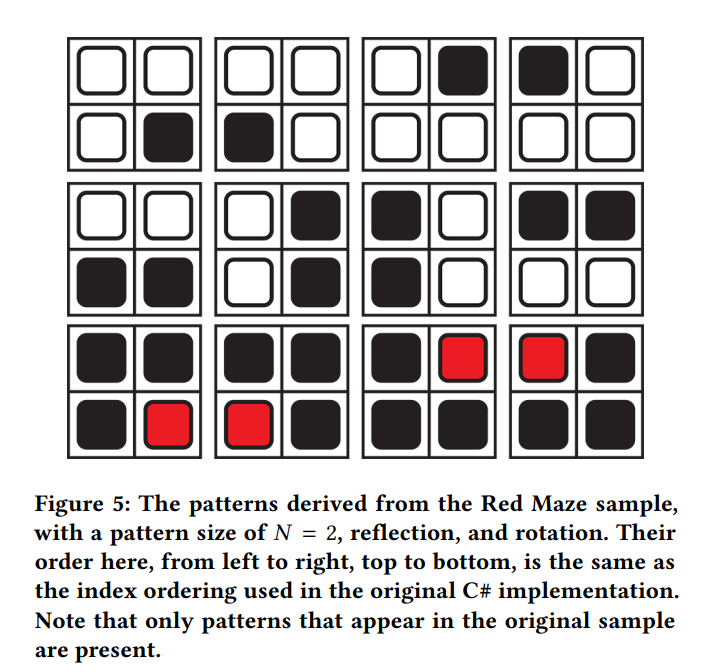

In [152]:
class Pattern:
    def __init__(self, pixels):
        self.pixels = pixels
        
    def __len__(self):
        return 1

0)((255, 255), (255, 0)) - weight = 1 - probability = 0.027777777777777776
1)((255, 0), (255, 255)) - weight = 1 - probability = 0.027777777777777776
2)((0, 255), (255, 255)) - weight = 1 - probability = 0.027777777777777776
3)((255, 255), (0, 255)) - weight = 1 - probability = 0.027777777777777776
4)((255, 255), (0, 0)) - weight = 4 - probability = 0.1111111111111111
5)((255, 0), (255, 0)) - weight = 4 - probability = 0.1111111111111111
6)((0, 0), (255, 255)) - weight = 4 - probability = 0.1111111111111111
7)((0, 255), (0, 255)) - weight = 4 - probability = 0.1111111111111111
8)((0, 0), (0, 138)) - weight = 4 - probability = 0.1111111111111111
9)((0, 138), (0, 0)) - weight = 4 - probability = 0.1111111111111111
10)((138, 0), (0, 0)) - weight = 4 - probability = 0.1111111111111111
11)((0, 0), (138, 0)) - weight = 4 - probability = 0.1111111111111111


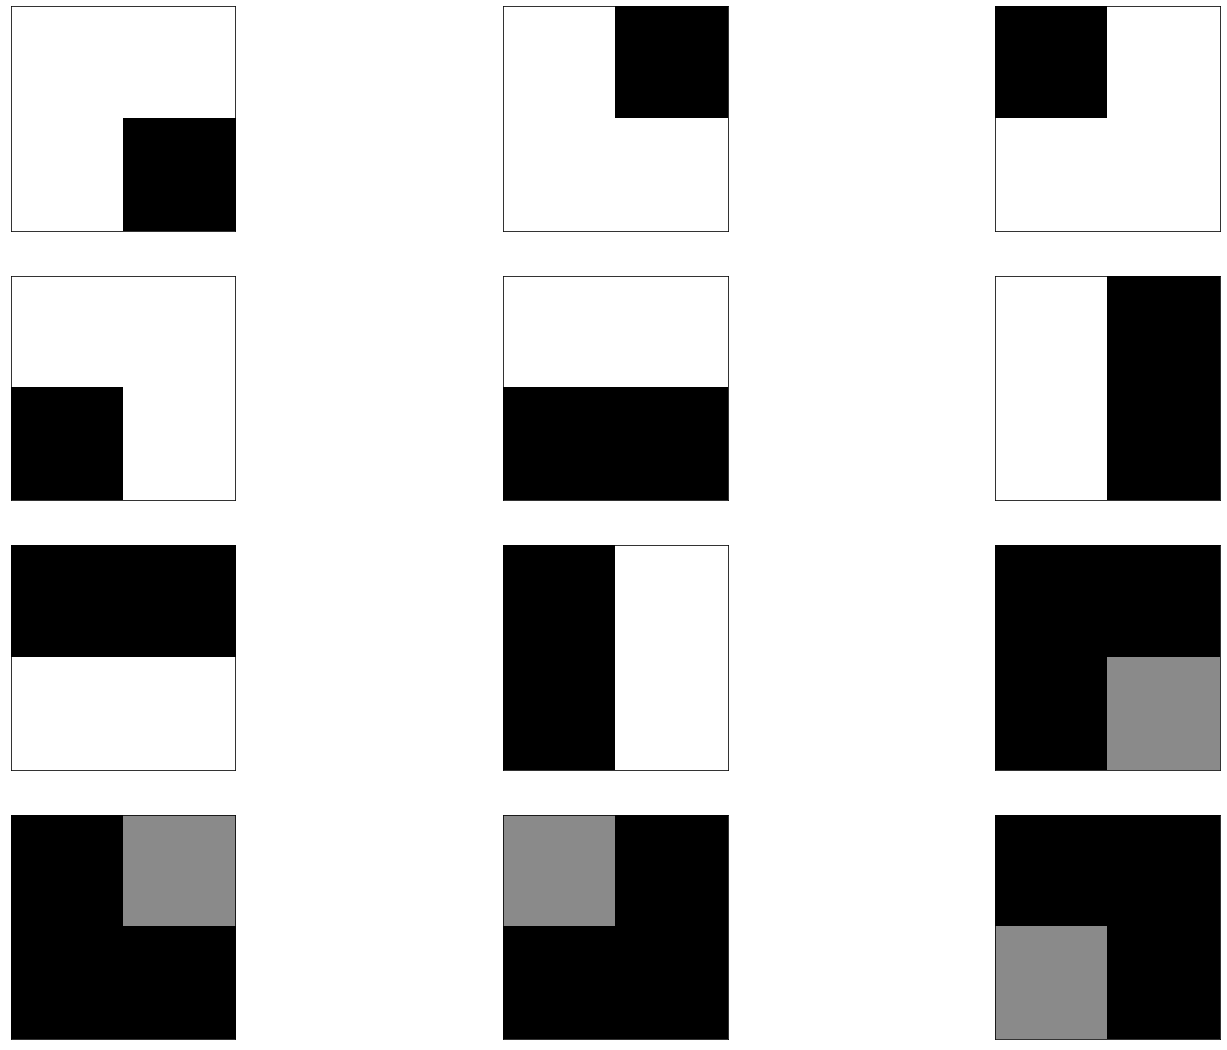

In [153]:
# Derive patterns from sample

def getAllRotations(pixelMatrix):
    """
    Return original array as well as rotated by 90, 180 and 270 degrees in the form of tuples
    """
    pixelMatrix_rotated_1 = [[pixelMatrix[j][i] for j in range(len(pixelMatrix))] for i in range(len(pixelMatrix[0])-1,-1,-1)]
    pixelMatrix_rotated_2 = [[pixelMatrix_rotated_1[j][i] for j in range(len(pixelMatrix_rotated_1))] for i in range(len(pixelMatrix_rotated_1[0])-1,-1,-1)]
    pixelMatrix_rotated_3 = [[pixelMatrix_rotated_2[j][i] for j in range(len(pixelMatrix_rotated_2))] for i in range(len(pixelMatrix_rotated_2[0])-1,-1,-1)]
    return tuple(tuple(row) for row in pixelMatrix), \
            tuple(tuple(row) for row in pixelMatrix_rotated_1), \
            tuple(tuple(row) for row in pixelMatrix_rotated_2), \
            tuple(tuple(row) for row in pixelMatrix_rotated_3)

N = 2 # pattern size
patterns = []
weights = {} # dict pattern -> occurence
probability = {} # dict pattern -> probability
for y in range(input_size[0]-(N-1)): # row 
    for x in range(input_size[1]-(N-1)): # column
        pattern = []
        for k in pixels[y:y+N]:
            pattern.append([int(i) for i in k[x:x+N]]) # change array to int really quick
        pattern_rotations = getAllRotations(pattern)
        
        for rotation in pattern_rotations:
            if rotation not in weights:
                weights[rotation] = 1
            else:
                weights[rotation] += 1
        
        patterns.extend(pattern_rotations)
        
# remove duplicates
patterns_without_duplicates = []
for patt in patterns:
    if patt not in patterns_without_duplicates:
        patterns_without_duplicates.append(patt)
patterns = patterns_without_duplicates

sum_of_weights = 0
for weight in weights:
    sum_of_weights += weights[weight]

for pattern in patterns:
    probability[pattern] = weights[pattern] / sum_of_weights
    
# convert patterns from tuples into Pattern objects
patterns = [Pattern(p) for p in patterns]
weights = {pattern:weights[pattern.pixels] for pattern in patterns}
probability = {pattern:probability[pattern.pixels] for pattern in patterns}

# show 
plt.figure(figsize=(25,19))
for m in range(len(patterns)):
    print(f"{m}){patterns[m].pixels} - weight = {weights[patterns[m]]} - probability = {probability[patterns[m]]}")
    axs = plt.subplot(4, math.ceil(len(patterns)/4), m+1)
    axs.imshow(patterns[m].pixels, cmap="gray", vmin=0, vmax=255)
    axs.set_xticks([])
    axs.set_yticks([])
plt.show()
    
    

In [131]:
# Create an index datastructure that descibes the ways that the patterns can be placed near one another
## Overlaped version; calculate whether the union between two patterns match whem one placed near the other

class Index:
    """
    Tells which combinations of patterns are allowed for all patterns
    
    data (dict):
        pattern -> posible_connections (dict):
                    relative_position -> patterns (list)
    """
    
    def __init__(self, patterns: List[Pattern]):
        self.data = {}
        for pattern in patterns:
            self.data[pattern] = {}
            for d in dirs: 
                self.data[pattern][d] = []
    
    def addRule(self, pattern: Pattern, relative_position: tuple, next_pattern: Pattern):
        self.data[pattern][relative_position].append(next_pattern)
        
        
    def checkPossibility(self, pattern: Pattern, checkPattern: Pattern, relative_pos: tuple):
        if isinstance(pattern, list):
            pattern = pattern[0]
            
        return checkPattern in self.data[pattern][relative_pos]

In [132]:
index = Index(patterns)

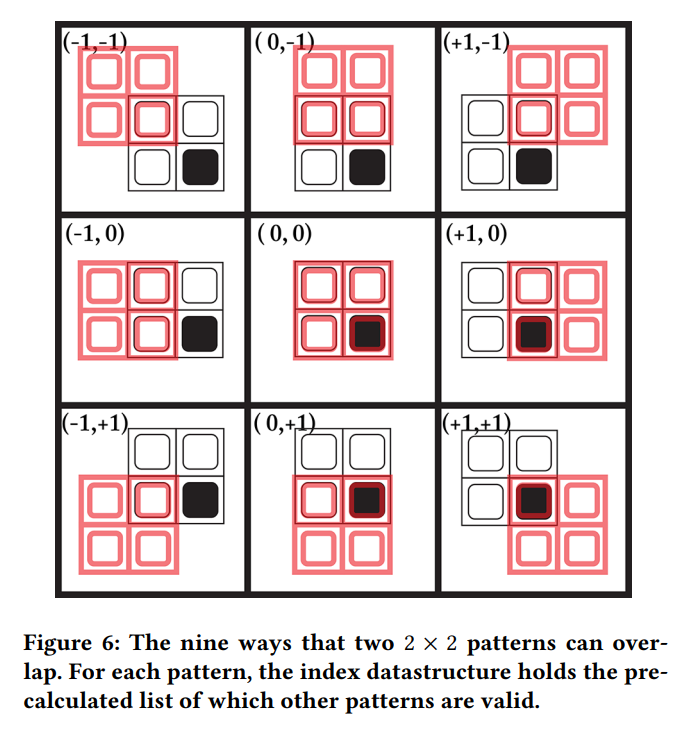

In [133]:
# Hard coded tiles positions for each offset
def getOffsetTiles(pattern: Pattern, offset: tuple):
    if offset == (0, 0):
        return pattern.pixels
    if offset == (-1, -1):
        return tuple([pattern.pixels[1][1]])
    if offset == (0, -1):
        return tuple(pattern.pixels[1][:])
    if offset == (1, -1):
        return tuple([pattern.pixels[1][0]])
    if offset == (-1, 0):
        return tuple([pattern.pixels[0][1], pattern.pixels[1][1]])
    if offset == (1, 0):
        return tuple([pattern.pixels[0][0], pattern.pixels[1][0]])
    if offset == (-1, 1):
        return tuple([pattern.pixels[0][1]])
    if offset == (0, 1):
        return tuple(pattern.pixels[0][:])
    if offset == (1, 1):
        return tuple([pattern.pixels[0][0]])

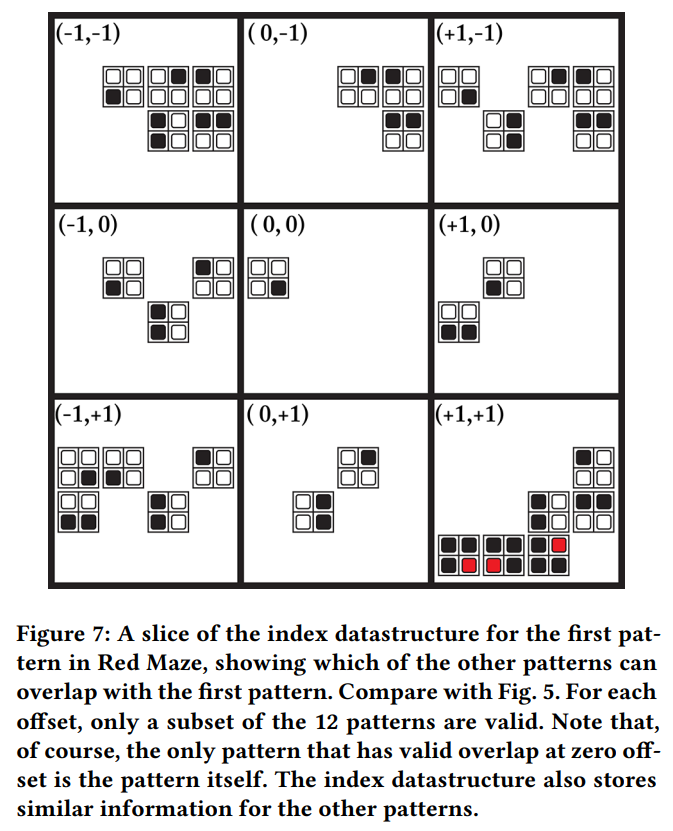

In [134]:
# Generate rules for Index and save them
for pattern in patterns:
    for d in dirs:
        for pattern_next in patterns:
            # here's checking all offsets 
            overlap = getOffsetTiles(pattern_next, d)
            part_of_og_pattern = getOffsetTiles(pattern, tuple([d[0]*-1, d[1]*-1]))
            if (overlap) == (part_of_og_pattern):
                index.addRule(pattern, d, pattern_next)

In [135]:
# Data in Index
for d in index.data:
    print(f'Pattern {d.pixels}')
    for pos in index.data[d]:
        print(f' Pos {pos}')
        for pattern in index.data[d][pos]:
            print(f' {pattern.pixels}')

Pattern ((0, 0), (0, 255))
 Pos (0, -1)
 ((0, 255), (0, 0))
 ((255, 0), (0, 0))
 ((255, 255), (0, 0))
 Pos (0, 1)
 ((0, 255), (0, 0))
 ((0, 255), (255, 255))
 ((0, 255), (0, 255))
 Pos (-1, 0)
 ((255, 0), (0, 0))
 ((0, 0), (255, 0))
 ((255, 0), (255, 0))
 Pos (1, 0)
 ((0, 0), (255, 0))
 ((0, 255), (255, 255))
 ((0, 0), (255, 255))
 Pos (-1, -1)
 ((0, 255), (0, 0))
 ((255, 0), (0, 0))
 ((0, 0), (255, 0))
 ((255, 255), (255, 0))
 ((255, 255), (0, 0))
 ((255, 0), (255, 0))
 Pos (1, -1)
 ((0, 0), (0, 255))
 ((0, 255), (0, 0))
 ((255, 0), (0, 0))
 ((255, 255), (0, 255))
 ((255, 255), (0, 0))
 ((0, 255), (0, 255))
 Pos (-1, 1)
 ((0, 0), (0, 255))
 ((255, 0), (0, 0))
 ((0, 0), (255, 0))
 ((255, 0), (255, 255))
 ((255, 0), (255, 0))
 ((0, 0), (255, 255))
 Pos (1, 1)
 ((255, 0), (0, 0))
 ((255, 255), (0, 255))
 ((255, 255), (255, 0))
 ((255, 0), (255, 255))
 ((255, 255), (255, 255))
 ((255, 255), (0, 0))
 ((255, 0), (255, 0))
Pattern ((0, 255), (0, 0))
 Pos (0, -1)
 ((0, 0), (0, 255))
 ((255, 2

In [136]:
def initializeWaveFunction(size):
    """
    Initialize wave function of the size 'size' where in each tile no patterns are foridden yet.
    Coefficients describe what patterns can occur in each tile. At the beggining, at every possition there is full set
    of patterns available
    """
    
    coefficients = []
    
    for col in range(size[0]):
        row = []
        for r in range(size[1]):
            row.append(patterns)
        coefficients.append(row)
    return coefficients

In [137]:
def isFullyCollapsed():
    """
    Check if wave function is fully collapsed meaning that for each tile available is only one pattern
    """
    for col in coefficients:
        for entry in col:
            if(len(entry)>1):
                return False
    return True

In [138]:
def getPossiblePatternsAtPosition(position):
    """
    Return possible patterns at position (x, y)
    """
    x, y = position
    possible_patterns = coefficients[x][y]
    return possible_patterns

The information entropy, often just entropy, is a basic quantity in information theory associated to any random variable, which can be interpreted as the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes. 
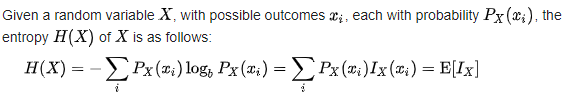

Variable X is a position in the matrix <br>
x<sub>i</sub> is a pattern and P(x<sub>i</sub>) is a probability for this pattern to occure in the original sample <br>
b in the base of the logarithm typically is equal to 2, e or 10

In [ ]:
def getShannonEntropy(position):
    """
    Calcualte the Shannon Entropy at position (x, y)
    """
    x, y = position
    entropy = 0
    
    # A cell with one valid pattern has 0 entropy
    if len(coefficients[x][y]) == 1:
        return 0
    
    for pattern in coefficients[x][y]:
        entropy += probability[pattern] * 
        math.log(probability[pattern], 2)
    entropy *= -1
    
    # Add noise to break ties and near-ties
    entropy -= random.uniform(0, 0.1)
    return entropy

In [ ]:
def getMinEntropyPos():
    """
    Return position of tile with the lowest entropy
    """
    minEntropy = None
    minEntropyPos = None
    
    for x, col in enumerate(coefficients):
        for y, row in enumerate(col):
            entropy = getShannonEntropy((x, y))
            
            if entropy == 0:
                continue
            
            if minEntropy is None or entropy < minEntropy:
                minEntropy = entropy
                minEntropyPos = (x, y)
    return minEntropyPos

In [ ]:
coefficients = initializeWaveFunction(output_size)

In [ ]:
def show_matrix():
    pixels = []
    
    for row in coefficients:
        pixels_row = []
        for entry in row:
            pixels_row.append(len(entry))
        pixels.append(pixels_row)

    plt.imshow(pixels, cmap="gray")
    plt.show()

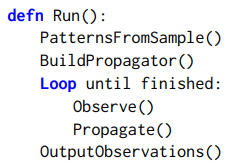
- PatternsFromSample() is equivalent to selecting parts of sample image and rotating them
- BuildPropagator() creates index data structure which here is done while creating Index
- Loop until finished refers to loop iterating while isFullyCollapsed(coefficients) is returning False

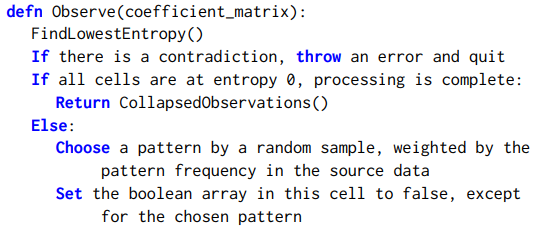

In [143]:
def observe():
    # Find the lowest entropy
    min_entropy_pos = getMinEntropyPos()
    
    if min_entropy_pos == None:
        print("All tiles have 0 entropy")
        return
    
    # Choose a pattern at lowest entropy position which is most frequent in the sample
    possible_patterns = getPossiblePatternsAtPosition(min_entropy_pos)
    
    # calculate max probability for patterns that are left
    max_p = 0
    for pattern in possible_patterns:
        if max_p < probability[pattern]:
            max_p == probability[pattern]
    
    
    semi_random_pattern = random.choice([pat for pat in possible_patterns if probability[pat]>=max_p])
    
    # Set this pattern to be the only available at this position
    coefficients[min_entropy_pos[0]][min_entropy_pos[1]] = semi_random_pattern
    
    return min_entropy_pos

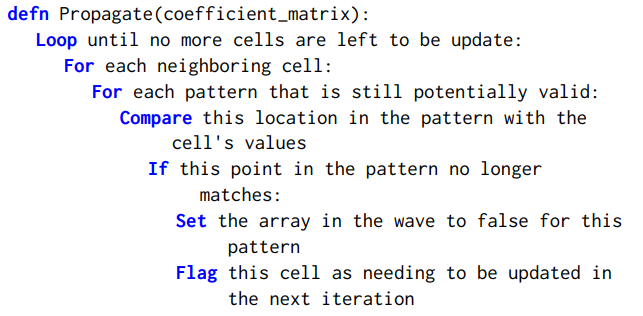

In [144]:
def propagate(min_entropy_pos):
    stack = [min_entropy_pos]
    
    
    while len(stack) > 0:
        pos = stack.pop()
        
        possible_patterns = getPossiblePatternsAtPosition(pos)
        
        # Iterate through each location immediately adjacent to the current location
        for d in validDirs(pos):
            adjacent_pos = (pos[0] + d[0], pos[1] + d[1])
            possible_patterns_at_adjacent = getPossiblePatternsAtPosition(adjacent_pos)
            
            # Iterate over all still available patterns in adjacent tile 
            # and check if pattern is still possible in this location
            if not isinstance(possible_patterns_at_adjacent, list):
                possible_patterns_at_adjacent = [possible_patterns_at_adjacent]
            for possible_pattern_at_adjacent in possible_patterns_at_adjacent:
                if len(possible_patterns) > 1:
                    is_possible = any([index.checkPossibility(pattern, possible_pattern_at_adjacent, d) for pattern in possible_patterns])
                else:
                    is_possible = index.checkPossibility(possible_patterns, possible_pattern_at_adjacent, d)
                    
                """
                If the tile is not compatible with any of the tiles in the current location's wavefunction
                then it's impossible for it to ever get choosen so it needs to be removed from the other
                location's wavefunction
                """
                if not is_possible:
                    x, y = adjacent_pos
                    coefficients[x][y] = [patt for patt in coefficients[x][y] if patt.pixels != possible_pattern_at_adjacent.pixels]
                        
                    if adjacent_pos not in stack:
                        stack.append(adjacent_pos)

In [145]:
while not isFullyCollapsed():
    min_entropy_pos = observe()
    propagate(min_entropy_pos)

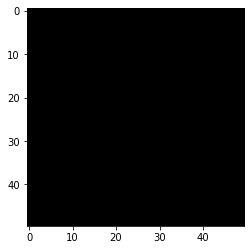

In [146]:
show_matrix()

In [147]:
final_pixels = []

for i in coefficients:
    row = []
    for j in i:
        if isinstance(j, list):
            first_pixel = j[0].pixels[0][0]
        else:
            first_pixel = j.pixels[0][0]
        row.append(first_pixel)
    final_pixels.append(row)

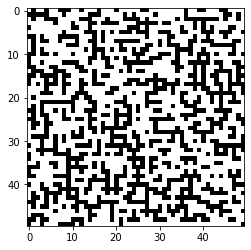

In [148]:
plt.imshow(final_pixels, cmap="gray")
plt.show()

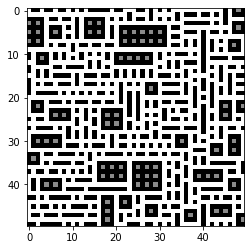

In [99]:
plt.imshow(final_pixels, cmap="gray")
plt.show()